In [1]:
import keepa
import numpy as np
import matplotlib as plt

api_key = 'e6ihvarndmd2iee2bgeg60afm06gru9242g310tb4tv1kji72u57uon4us908d5h'

api = keepa.Keepa(api_key)

In [2]:
bestsellers = []
electronics = '172282'
# bestsellers = api.best_sellers_query(electronics)

# print(bestsellers[0])

In [17]:
# api.category_lookup('172282')

{'172282': {'domainId': 1,
  'catId': 172282,
  'name': 'Electronics',
  'children': [493964, 13900861, 13900871, 13900851, 2527553011],
  'parent': 0,
  'highestRank': 31763226,
  'productCount': 9667376,
  'contextFreeName': None}}

In [3]:
# print(len(bestsellers))
# np.save('bestsellers.npy', bestsellers)
bestsellers = np.load('bestsellers.npy')

In [9]:
print(bestsellers[0:50])
print(len(bestsellers))

['B01J4GCK1W' 'B003X7INLK' 'B07JQ5WTZL' 'B079QHML21' 'B07FYPXRQ9'
 'B0043CHWHA' 'B00N2ZDXW2' 'B07HCPFPD2' 'B07PXGQC1Q' 'B06XX24YWT'
 'B014M8ZO8S' 'B07894S727' 'B07Q4D6QMC' 'B00FJEDOWI' 'B076H3SRXG'
 'B07P6T8J87' 'B072HNLLGN' 'B079JD7F7G' 'B01I0IGFKC' 'B00DUQUUDI'
 'B07K25P3D7' 'B071DVKMJM' 'B01E3QM34W' 'B07ZPC9QD4' 'B071RSRP7D'
 'B0774YFVV3' 'B071L1V7CN' 'B06XH3PWSF' 'B07M8DTHGL' 'B01B25PGRI'
 'B00WR23VRI' 'B071VDC6ZS' 'B07P3NPM1X' 'B07FZ8S74R' 'B00F4CEHNK'
 'B07CPS16L4' 'B00F2U3LIG' 'B01E9AHU8Q' 'B009WHV3BM' 'B07DGR98VQ'
 'B07BFS3G7P' 'B06XX1MSJQ' 'B01M0GB8CC' 'B06XT3H8T3' 'B07Q6ZR5PK'
 'B07FZ4ZFL9' 'B00BWU3HNY' 'B0791TX5P5' 'B07FKR6KXF' 'B06XGWJTS7']
510000


In [4]:
# Save Product Dictionaries to a file

# products_electronics_bs = api.query(bestsellers[0:300])
# assert(len(products_electronics_bs) > 50)
# assert(type(products_electronics_bs[0]) == dict)
# np.save('product_electronics_300.npy', products_electronics_bs)

products_electronics_bs_2 = api.query(bestsellers[300:600])
assert(len(products_electronics_2_bs) > 50)
assert(type(products_electronics_bs_2[0]) == dict)
np.save('product_electronics_300_600.npy', products_electronics_bs_2)


In [2]:
# To load a product dictionary:
# products_electronics_bs = np.load('product_electronics.npy', allow_pickle=True)

In [5]:
#Extract products with largest amazon price history
# products = list(np.load('product_electronics_300.npy', allow_pickle=True))
products.sort(key=(lambda product : len(product['data']['AMAZON'])), reverse=True)
products_50 = products[:50]
print('Average Number of tracked prices: ', sum([len((product['data']['AMAZON'])) for product in products_50])/50)

Average Number of tracked prices:  855.46


In [9]:
print('Min Number of tracked prices: ', min([len((product['data']['AMAZON'])) for product in products_50]))
print('Max Number of tracked prices: ', max([len((product['data']['AMAZON'])) for product in products_50]))

Min Number of tracked prices:  230
Max Number of tracked prices:  6306


In [6]:
# Count how many products have a price history longer than 50

cnt = 0
for product in products_50:
# for product in products_electronics_bs:
    if len(product['data']['AMAZON']) > 50:
        cnt += 1
print(cnt)


50


In [7]:
# np.save('product_electronics_50_price_history.npy', products_50)

In [10]:
for product in products_50:
    print('Product Title: ', product['title'], '\n')

Product Title:  BLUE Yeti Silver Edition, Mic Only (988-000103) 

Product Title:  Roku Streaming Media Player Long Range Wireless and Voice Remote (Roku Streaming Stick+) 

Product Title:  Contigo AUTOSEAL West Loop Vaccuum-Insulated Stainless Steel Travel Mug, 16  oz, Polar White 

Product Title:  Ultimate Ears MEGABOOM (2015) Portable Waterproof & Shockproof Bluetooth Speaker - Charcoal 

Product Title:  Ultimate Ears BOOM 2 Portable Waterproof & Shockproof Bluetooth Speaker - Brain Freeze Blue Edition 

Product Title:  NETGEAR Nighthawk Smart WiFi Router (R6700) - AC1750 Wireless Speed (up to 1750 Mbps) | Up to 1500 sq ft Coverage & 25 Devices | 4 x 1G Ethernet and 1 x 3.0 USB ports | Armor Security 

Product Title:  Polaroid 2x3ʺ Premium ZINK Zero Photo Paper 50-Pack - Compatible with Polaroid Snap / SnapTouch Instant Print Digital Cameras & Polaroid ZIP Mobile Photo Printer 

Product Title:  Scotch Thermal Laminating Pouches, 100-Pack, 8.9 x 11.4 inches, Letter Size Sheets (TP3854

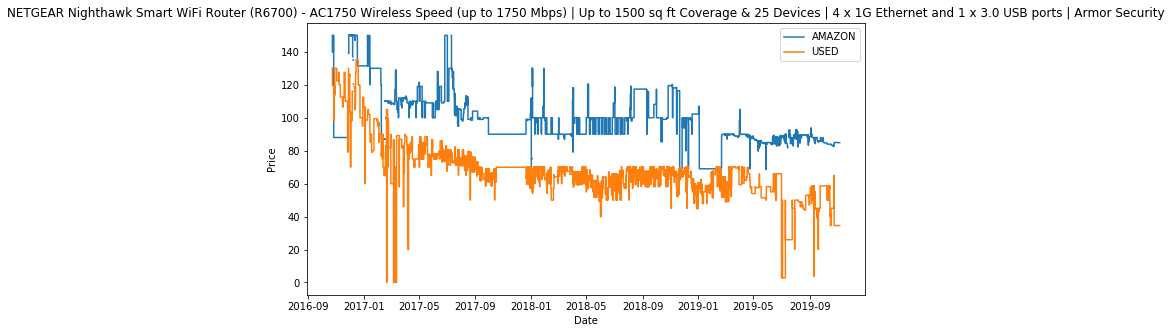

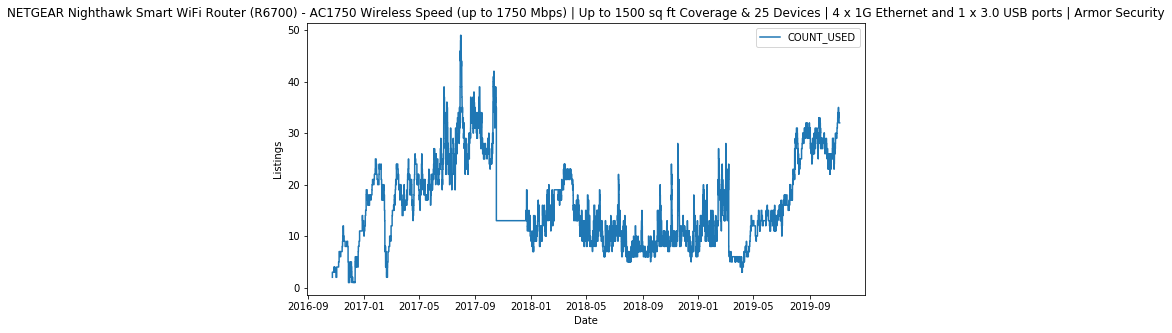

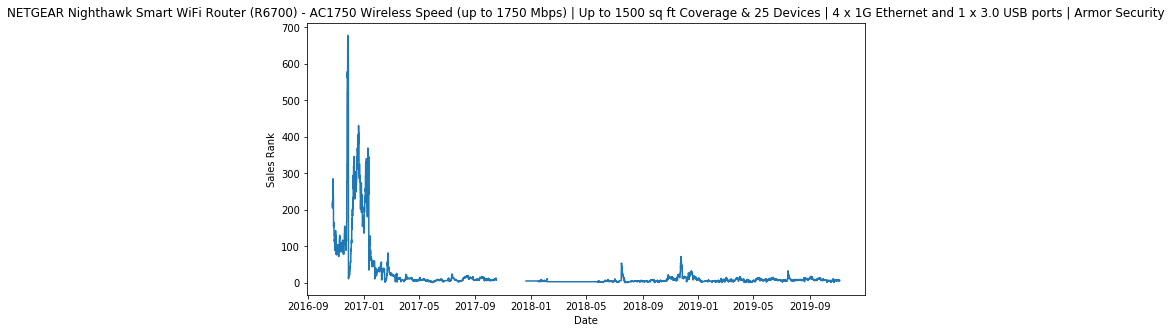

<Figure size 432x288 with 0 Axes>

In [6]:
# Example plot
keepa.plot_product(products_electronics_bs[25])